# Bicycle sales data analysis using python Pandas.
### Sales analysis for bicycle accessories at a global level. 

> **Project: Go through 6 years sales data step by step to Understand the data and get insights on bicycle sales using python.
With this project, I am not aiming to provide complete analysis of the data but to test the different data analysis features in  pandas.

In [2]:
#Upload of the packages/libraries I need for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline



In [4]:
#Upload the excel file from my PC
bike_sales = pd.read_excel(r'C:\Users\igieo\Desktop\DA Trains\SALES DATA\Bycicle_sales\sales_data.xlsx',parse_dates=['Date'])


> **The first step is to take a quick look at the data, shape, stats, and categories. 

In [5]:
#A glance at the data
bike_sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26.0,November,2013.0,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26.0,November,2015.0,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23.0,March,2014.0,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23.0,March,2016.0,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15.0,May,2014.0,47.0,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


In [6]:
#Columns and data types in the data
bike_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  float64       
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  float64       
 4   Customer_Age      113036 non-null  float64       
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  float64       
 13  Unit_Cost         113036 non-null  float64       
 14  Unit

In [7]:
#The data summary/statistics
bike_sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [8]:
#Get the numbers of rows and columns
bike_sales.shape

(113036, 18)

#### Applying pivot tables to get the summaries of the sales data

In [11]:
#Formatting for pivot tables

cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}


In [12]:
#first pivot table 
pivot_tab = bike_sales.pivot_table(index = 'Age_Group',columns = 'Product_Category',values = 'Revenue',aggfunc = 'sum')


#Formats for the pivot table
pvt = pivot_tab.style.format(precision=0, na_rep='NA', thousands=" ",
                formatter={('Accessories', 'Bikes', 'Clothing'): lambda x: "€ {:,.2f}".format(x*-1e6)
                          })
pvt.set_table_styles([cell_hover, index_names, headers])

pvt.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
], overwrite=False)

pvt.set_table_styles({
    ('Accessories', 'Bikes', 'Clothing'): [{'selector': 'th', 'props': 'border-left: 1px solid white'},
                               {'selector': 'td', 'props': 'border-left: 1px solid #000066'}]
}, overwrite=False, axis=0)


Product_Category,Accessories,Bikes,Clothing
Age_Group,,,
Adults (35-64),7 846 731,30 336 167,4 401 255
Seniors (64+),124 754,135 059,48 229
Young Adults (25-34),4 998 941,22 915 556,2 741 117
Youth (<25),2 147 566,8 395 352,1 180 281


> **From first pivot; it is clear that the most important product (Bîles) is the same for all age groups.

In [13]:
#Going deeper into the product categories for the different age groups. 

pivot_tab1 = bike_sales.pivot_table(index = 'Age_Group',columns = 'Sub_Category',values = 'Revenue',aggfunc = 'sum')

pvt1 = pivot_tab1.style.format(precision=0, na_rep='NA', thousands=" ",
                formatter={('Accessories', 'Bikes', 'Clothing'): lambda x: "€ {:,.2f}".format(x*-1e6)
                          })
pvt1.set_table_styles([cell_hover, index_names, headers])



pvt1

Sub_Category,Bike Racks,Bike Stands,Bottles and Cages,Caps,Cleaners,Fenders,Gloves,Helmets,Hydration Packs,Jerseys,Mountain Bikes,Road Bikes,Shorts,Socks,Tires and Tubes,Touring Bikes,Vests
Age_Group,,,,,,,,,,,,,,,,,
Adults (35-64),312 718,174 582,722 305,271 752,103 918,661 197,451 895,2 981 743,555 830,2 081 734,10 534 548,15 723 543,984 266,66 453,2 334 438,4 078 076,545 155
Seniors (64+),845,2 633,8 894,2 163,1 410,9 367,4 623,40 755,9 585,21 441,66 250,59 483,4 164,1 635,51 265,9 326,14 203
Young Adults (25-34),165 922,101 881,456 094,191 938,61 415,399 058,276 453,1 921 160,290 740,1 450 066,7 861 417,12 439 924,485 478,54 447,1 602 671,2 614 215,282 735
Youth (<25),38 315,64 979,221 881,82 924,32 078,176 111,138 448,797 423,134 251,560 501,2 661 311,5 140 111,266 802,24 636,682 528,593 930,106 970


In [14]:
#Pivot table, summary by country. Highlighting the best year per country
pivot_tab2 = bike_sales.pivot_table( index=['Year'], 
                                    columns=['Country'], 
                                    values='Revenue',
                                    aggfunc='sum')

pvt2 = pivot_tab2.style.format(precision=0, na_rep='NA', 
                               thousands=" ")

pvt2.set_table_styles([cell_hover, index_names, headers])

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
pvt2.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)



Country,Australia,Canada,France,Germany,United Kingdom,United States
Year,,,,,,
2011.000000,2 529 914,789 798,946 624,833 603,823 481,3 041 468
2012.000000,2 557 511,835 527,962 153,835 188,834 885,3 150 719
2013.000000,4 107 470,1 443 537,1 431 870,1 452 704,1 868 796,4 935 660
2014.000000,2 802 842,1 471 522,1 411 100,1 702 508,2 014 044,4 750 708
2015.000000,5 712 339,1 731 954,1 877 928,1 931 091,2 484 181,6 286 498
2016.000000,3 591 983,1 663 400,1 803 197,2 223 502,2 620 809,5 810 494


In [15]:
#Pivot table, summary by year and product
pivot_tab3 = bike_sales.pivot_table(index=['Year', 'Product_Category'],
                        values='Revenue',
                        aggfunc=['sum', 'mean','count',],
                        margins=True,margins_name='Grand Total')


pvt3 = pd.io.formats.style.Styler(pivot_tab3, precision=2,
                           table_styles=([{'selector': 'td:hover',
                                        'props': [('background-color','yellow')]}]),
                           caption='PivotTable', table_attributes='env',
                           na_rep="NA",uuid_len=0, cell_ids=False,
                           decimal=".", thousands=" ")

pvt3

In [16]:
### Pivot table, summary by year and country
pivot_tab4 = bike_sales.pivot_table(index=['Country','Year' ],
                         values='Revenue',
                        aggfunc=['sum', 'mean','count',])

pvt4 = pivot_tab4.style.format(precision=0, na_rep='NA', 
                               thousands=" ")
pivot_tab4.style.highlight_max(axis=0, props='color:white; font-weight:bold; background-color:darkblue;').set_precision(0)



C:\Users\igieo\AppData\Local\Temp\ipykernel_3744\4211352365.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pivot_tab4.style.highlight_max(axis=0, props='color:white; font-weight:bold; background-color:darkblue;').set_precision(0)


In [17]:
### Pivot table, summary by year and country
pivot_tab6 = bike_sales.pivot_table(index=['Country', 'Year'],
                        values=['Cost','Revenue','Profit'],  
                        aggfunc=['sum'])  

cm = sns.light_palette("blue", as_cmap=True)

pivot_tab6.style.background_gradient(cmap=cm).set_precision(0)


C:\Users\igieo\AppData\Local\Temp\ipykernel_3744\514430237.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pivot_tab6.style.background_gradient(cmap=cm).set_precision(0)


In [18]:
## Pivot table, summary by year and country on unit cost and price
#highliting the highest prices and costs.
pivot_tab7 = bike_sales.pivot_table(index=['Country', 'Year'],
                        values=['Unit_Cost','Unit_Price','Order_Quantity'],  
                        aggfunc=['mean'],        
                        margins=True,
                        margins_name='Grand Total')   
                        
    
pivot_tab7.style.highlight_quantile(q_left=0.85, axis=None, color='yellow')


In [19]:
## Pivot table, summary by year and Age groups on profit and revenue
#highliting the highest,lowest revenues and profit.

pivot_tab8 = bike_sales.pivot_table(index=['Age_Group','Year' ],
                        values=['Revenue', 'Profit'],
                                  aggfunc=['sum'])   
                        
cm = sns.light_palette("blue", as_cmap=True)

pivot_tab8.style.background_gradient(cmap=cm).set_precision(0).highlight_min(axis=0, color='yellow').highlight_max(axis=0, color='green')


C:\Users\igieo\AppData\Local\Temp\ipykernel_3744\952012663.py:10: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pivot_tab8.style.background_gradient(cmap=cm).set_precision(0).highlight_min(axis=0, color='yellow').highlight_max(axis=0, color='green')


In [23]:
## Pivot table, summary by year and products on profit and revenue
pivot_tab9 = bike_sales.pivot_table(index=['Product_Category','Year' ],
                        values=['Revenue', 'Profit'],
                                  aggfunc=['sum'],
                        margins=True,
                        margins_name='Grand Total')   
                        
pivot_tab9.style.format('{:.0f}', na_rep="", thousands=" ")\
         .text_gradient(cmap="bwr", vmin=-2.5, vmax=2.5)\
            .set_table_styles([{"selector": "th", "props": "color: blue;"}])

#### After a series of pivot summaries of the data to study and understand the data, now here are a sereis of stats on the data

In [63]:
#Sales records per year
bike_sales['Year'].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

In [44]:
#Statisitics cost per unit
bike_sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [30]:
#Statisitics price per unit
bike_sales['Unit_Price'].describe()

count    113036.000000
mean        452.938427
std         922.071219
min           2.000000
25%           5.000000
50%          24.000000
75%          70.000000
max        3578.000000
Name: Unit_Price, dtype: float64

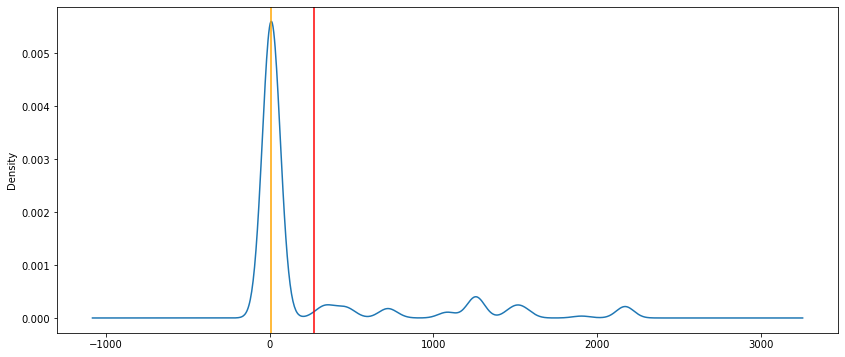

In [31]:
#Distrubution of the unit cost

ax = bike_sales['Unit_Cost'].plot(kind='density', figsize=(14,6))
ax.axvline(bike_sales['Unit_Cost'].mean(), color='red')
ax.axvline(bike_sales['Unit_Cost'].median(), color='orange')

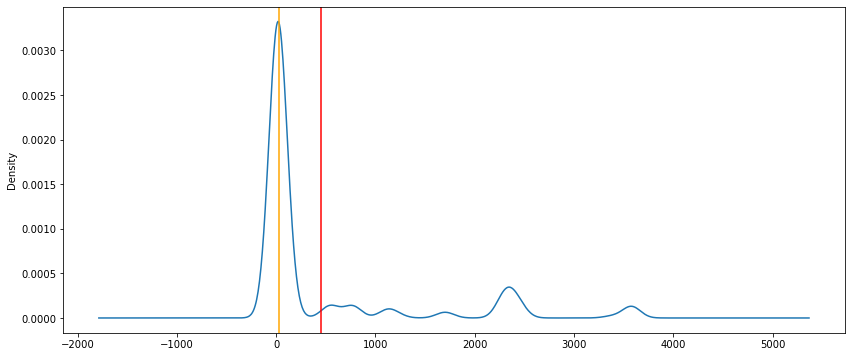

In [32]:
#Distrubution of the unit price
ax = bike_sales['Unit_Price'].plot(kind='density', figsize=(14,6))
ax.axvline(bike_sales['Unit_Price'].mean(), color='red')
ax.axvline(bike_sales['Unit_Price'].median(), color='orange')

Text(0.5, 0, '$')

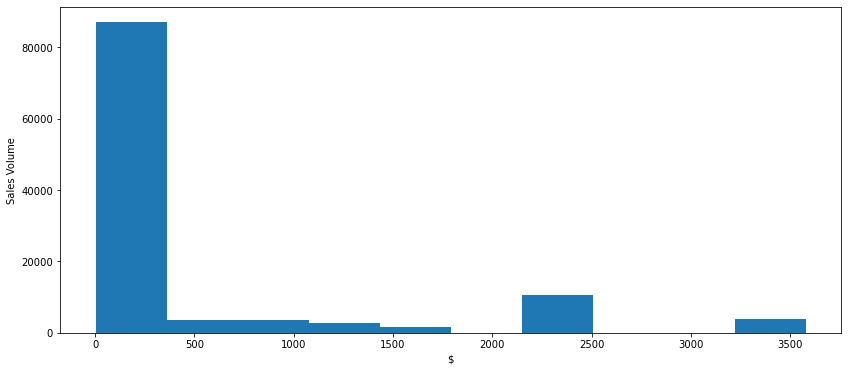

In [34]:
#Distrubution of the unit price with an histogram
ax = bike_sales['Unit_Price'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Sales Volume')
ax.set_xlabel('$')

In [38]:
#Categorical analysis Age groups,average age
bike_sales['Age_Group'].describe()

count             113036
unique                 4
top       Adults (35-64)
freq               55824
Name: Age_Group, dtype: object

In [46]:
#statistics of the  customer age
bike_sales['Customer_Age'].describe()

count    113036.000000
mean         35.919212
std          11.021936
min          17.000000
25%          28.000000
50%          35.000000
75%          43.000000
max          87.000000
Name: Customer_Age, dtype: float64

<AxesSubplot:>

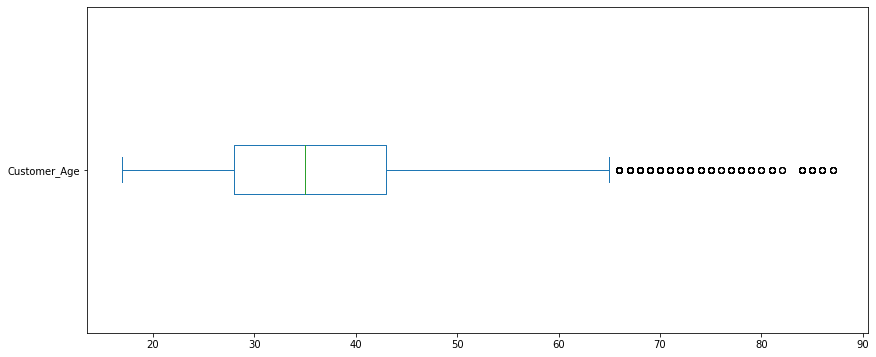

In [98]:
#Distrubution of the ages of the  customers with a boxplot
bike_sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

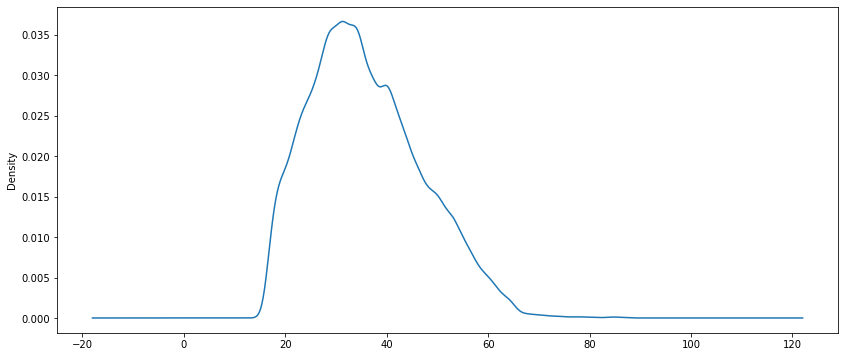

In [99]:
#Distrubution of the ages of the  customers with density dist 
bike_sales['Customer_Age'].plot(kind='kde', figsize=(14,6))

Text(0, 0.5, 'Sales Volume')

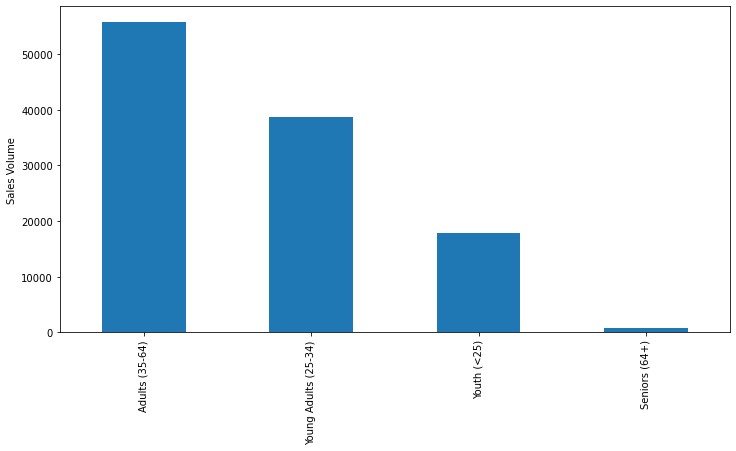

In [46]:
#Barcharts on age groups with sales activities
ax = bike_sales['Age_Group'].value_counts().plot(kind='bar', figsize=(12,6))
ax.set_ylabel('Sales Volume')

In [45]:
#count of the sales by age group
bike_sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

#### This part analysis the relationships in the data

In [50]:
#Relationships,correlation table
corr = bike_sales.corr()

corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


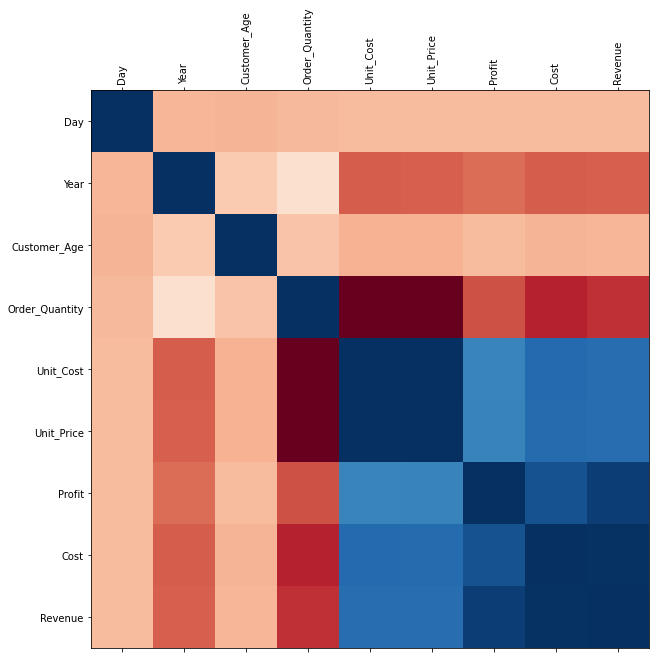

In [52]:
#using the density table to improve the visibility of the correlation 

fig = plt.figure(figsize=(10,10))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

As one should expect, the correlation is obvious between revenue,cost, and profit.

<AxesSubplot:xlabel='Cost', ylabel='Profit'>

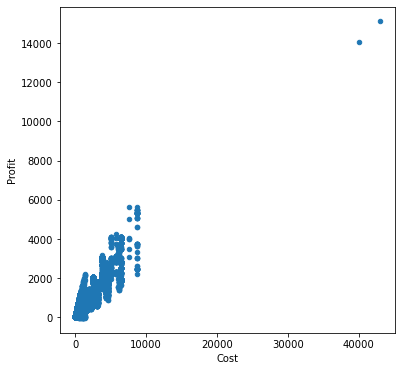

In [47]:
#Cost profit relatioship
bike_sales.plot(kind='scatter', x='Cost', y='Profit', figsize=(6,6))

<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

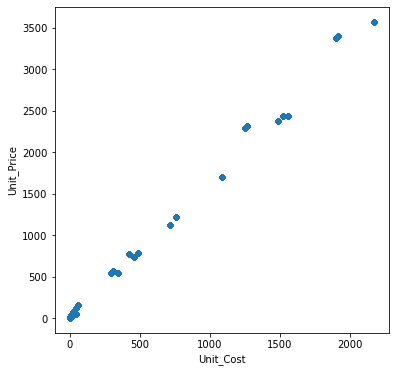

In [52]:
##cost/price relatioship
bike_sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

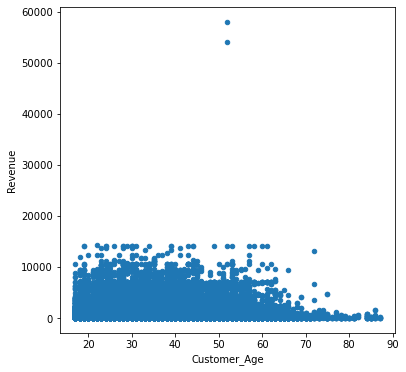

In [48]:
##Revenue/age relatioship
bike_sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

#### Using boxplots to compare the different categories and dimensions in the data

Text(0, 0.5, 'Revenue')

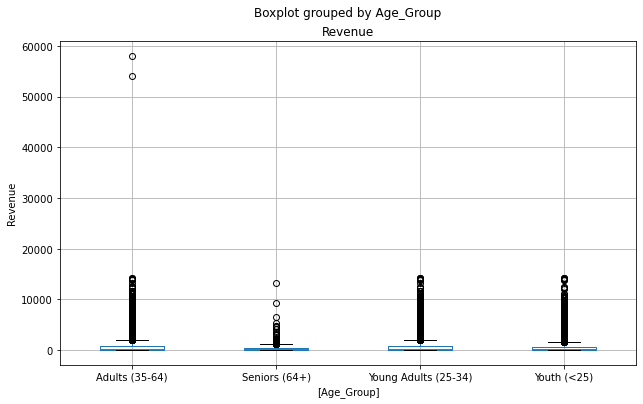

In [59]:
##Revenue/age groups box plots
ax = bike_sales[['Revenue', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Revenue')

<AxesSubplot:title={'center':'Customer_Age'}, xlabel='[Country]'>

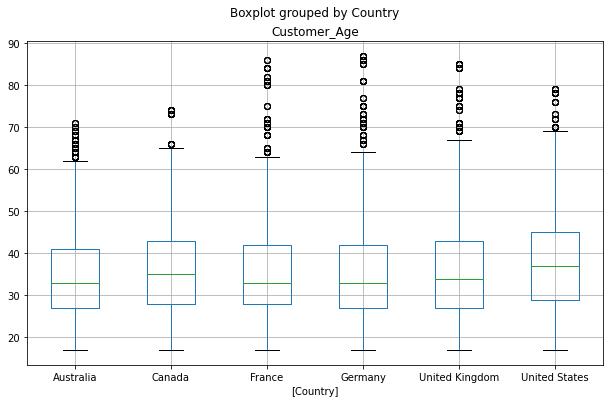

In [49]:
bike_sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

<AxesSubplot:title={'center':'Profit'}, xlabel='[Month]'>

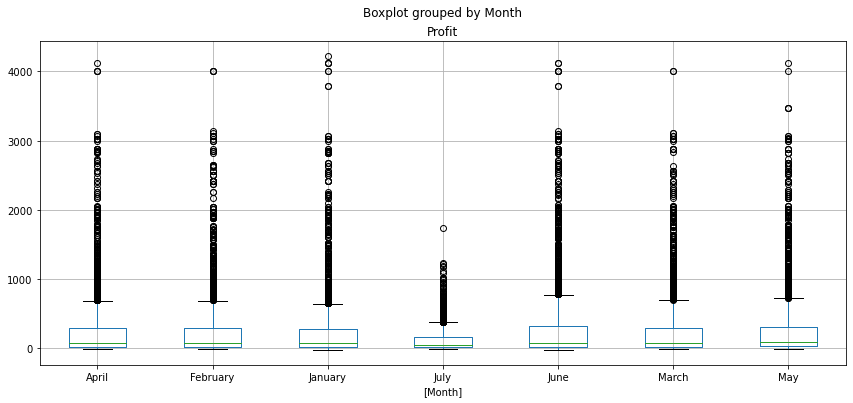

In [64]:
profit_2016 = bike_sales.loc[bike_sales['Year'] == 2016, ['Profit', 'Month']]

profit_2016.boxplot(by='Month', figsize=(14,6))

<AxesSubplot:>

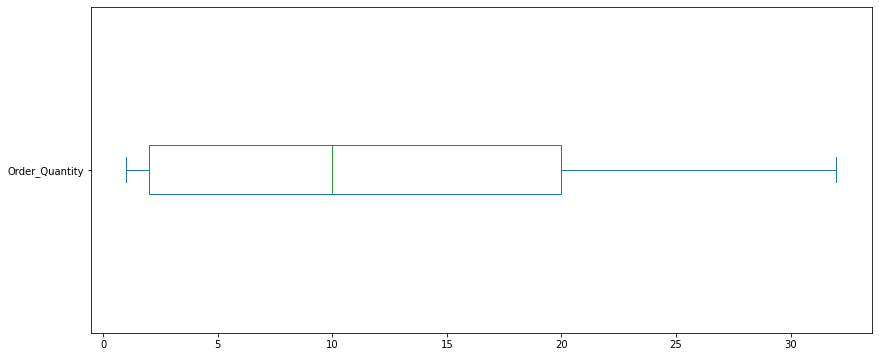

In [61]:
bike_sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

## wrangling the columns

#### Calculations and specific insights from the data by age,country, and period of the year

In [72]:
#Revenue_per_Age
bike_sales['Revenue_per_Age'] = bike_sales['Revenue'] / bike_sales['Customer_Age']
bike_sales['Profit_per_Age'] = bike_sales['Profit'] / bike_sales['Customer_Age']


<AxesSubplot:ylabel='Frequency'>

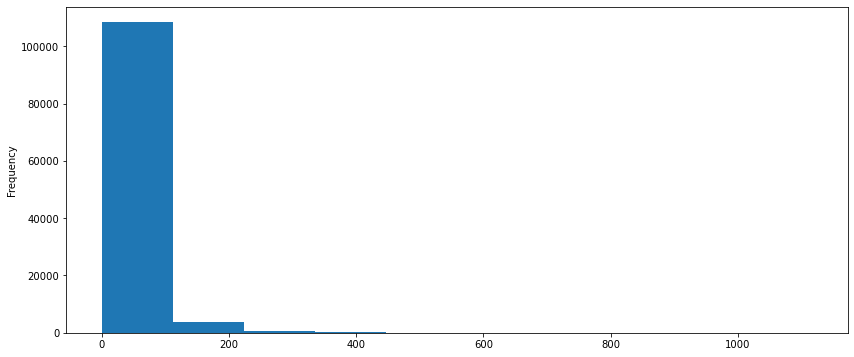

In [71]:
bike_sales['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))


<AxesSubplot:ylabel='Year'>

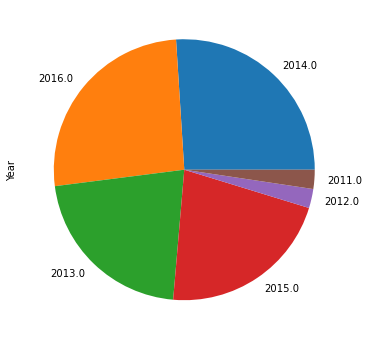

In [93]:
#Total sales over the 6 years period
bike_sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

In [103]:
#Sales actiivities by month over the 6 years period
bike_sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

<AxesSubplot:>

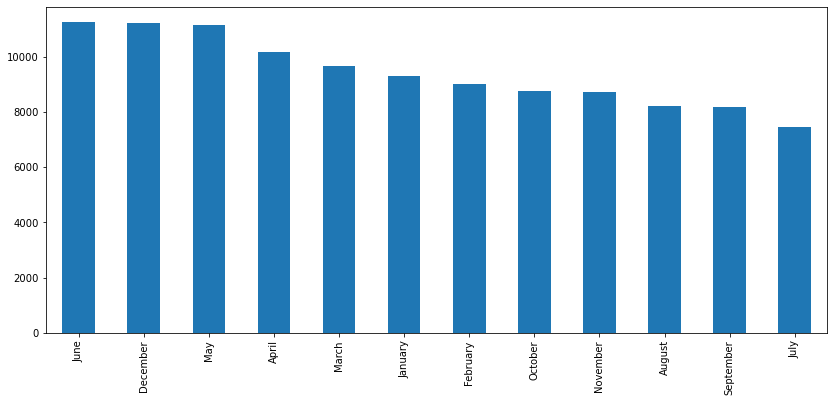

In [104]:
bike_sales['Month'].value_counts().plot(kind='bar', figsize=(14,6))

In [73]:
bike_sales['Unit_Price'].head()

0    120.0
1    120.0
2    120.0
3    120.0
4    120.0
Name: Unit_Price, dtype: float64

In [94]:
#Increasing sales prices
#sales['Unit_Price'] = sales['Unit_Price'] * 1.03

bike_sales['Unit_Price'] *= 1.03

In [95]:
bike_sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

<AxesSubplot:>

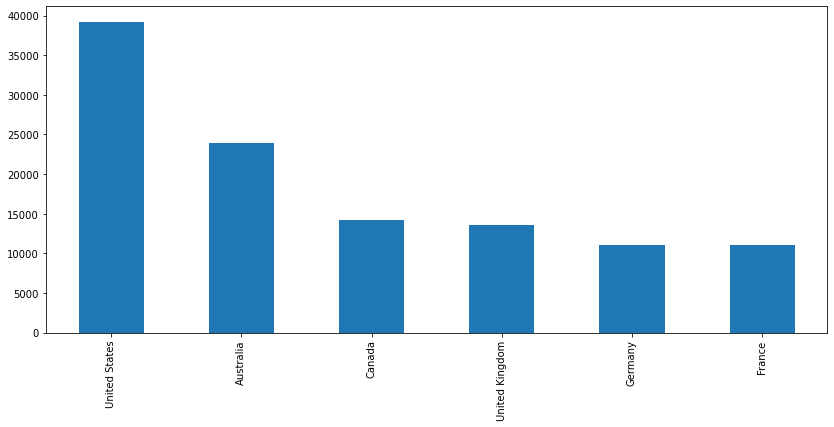

In [109]:
#Total sales over the 6 years period by countries
bike_sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

#### This last part gives insights on sales by category over the 6 years period.

In [74]:
bike_sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<AxesSubplot:ylabel='Product_Category'>

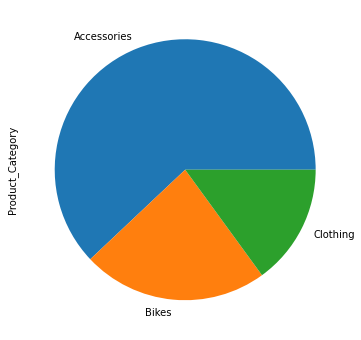

In [119]:
bike_sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

In [122]:
bikes = bike_sales.loc[bike_sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

bikes

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

<AxesSubplot:ylabel='Sub_Category'>

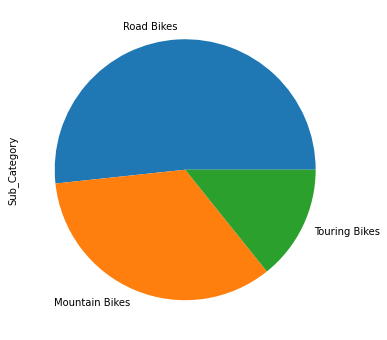

In [124]:
bikes.plot(kind='pie', figsize=(6,6))

In [125]:
 bike_sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

In [69]:
cond = bike_sales['Revenue'] == bike_sales['Revenue'].max()

bike_sales.loc[cond]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Profit_per_Age
112073,2015-07-24,24.0,July,2015,52.0,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29.0,1482.0,2384.0,15096.0,42978.0,58074.0,1116.807692,290.307692


In [67]:
cond = bike_sales['Revenue'] > 10_000

bike_sales.loc[cond, 'Order_Quantity'].mean()

3.7218934911242605

In [66]:
cond = bike_sales['Revenue'] < 10_000

bike_sales.loc[cond, 'Order_Quantity'].mean()

11.913907519469818

In [65]:
cond = (bike_sales['Year'] == 2016) & (bike_sales['Month'].isin(['May', 'June', 'July']))

bike_sales.loc[cond].shape[0]

12164